In [1]:
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)
library(twitteR)
library(tm)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'glue'

The following object is masked from 'package:dplyr':

    collapse

Warning message:
"package 'twitteR' was built under R version 3.6.3"
Attaching package: 'twitteR'

The following objects are masked from 'package:dplyr':

    id, location

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP

Att

# Importing all libraries for the sentiment analysis on twitter data

In [49]:
covid = searchTwitter('#covid-19 #coronavirus', n = 1000, lang = 'en')
#class(covid)
covid = twListToDF(covid)

# Using searchTwitter function to search for tweets in the twitter and converting tweets into a dataframe using twlisttodf function

In [50]:
write.csv(covid,"C:/Users/MANI/Documents/R sem 2/covid-19/covid.csv")

# writing into a csv file

In [51]:
pos <- get_sentiments("bing") %>% filter(sentiment == "positive")
neg <- get_sentiments("bing") %>% filter(sentiment == "negative")
class(pos)

[1] "tbl_df"     "tbl"        "data.frame"

# Getting seentiments from bing lexicons and storing in pos and neg

In [52]:
sentences <- covid$text

# Getting only text column from covid dataframe and storing in sentences

In [53]:
sentences = gsub('[^A-z ]','', sentences)

# removing all unknown special characters except A-z and replacing it with space

In [2]:
sentences = tolower(sentences)
head(sentences)

[1] "the birch canoe slid on the smooth planks." 
[2] "glue the sheet to the dark blue background."
[3] "it's easy to tell the depth of a well."     
[4] "these days a chicken leg is a rare dish."   
[5] "rice is often served in round bowls."       
[6] "the juice of lemons makes fine punch."

# converting into lowercase 

In [4]:
word_list = str_split(sentences, '\\s+')

# Splitting the sentences using str_split

In [5]:
head(word_list)

[[1]]
[1] "the"     "birch"   "canoe"   "slid"    "on"      "the"     "smooth" 
[8] "planks."

[[2]]
[1] "glue"        "the"         "sheet"       "to"          "the"        
[6] "dark"        "blue"        "background."

[[3]]
[1] "it's"  "easy"  "to"    "tell"  "the"   "depth" "of"    "a"     "well."

[[4]]
[1] "these"   "days"    "a"       "chicken" "leg"     "is"      "a"      
[8] "rare"    "dish."  

[[5]]
[1] "rice"   "is"     "often"  "served" "in"     "round"  "bowls."

[[6]]
[1] "the"    "juice"  "of"     "lemons" "makes"  "fine"   "punch."

In [57]:
#class(word_list)
word = unlist(word_list)
class(word)
length(word)

[1] "character"

[1] 18640

In [58]:
tab = table(word)
tabdf <- as.data.frame(tab)

# Converting into a dataframe and arrange it using frequency

In [59]:
tab_frequency <- tabdf %>% arrange(-Freq)
dim(tab_frequency)

[1] 3986    2

In [60]:
stop = stopwords()

# Removing stopwords 

In [61]:
tab3 <- tab_frequency %>% filter(!word %in% stop)
tab3 <- tab3 %>% filter(word!= 'rt')

In [71]:
word = tab3[, 1]
word = data_frame(word)
#class(word)

# getting only word column from tab3 and comparing it with bing lexicon word column and getting sentiments

In [63]:
sentiments = word %>%
inner_join(get_sentiments("bing"))%>%
count(sentiment) %>% 
spread(sentiment, n, fill = 0) %>% 
mutate(sentiment = positive - negative)

Joining, by = "word"
Warning message:
"Column `word` joining factor and character vector, coercing into character vector"

In [65]:
sentiments

negative,positive,sentiment
174,142,-32


# Negative sentiments are more than positive in twitter covid-19 data

In [69]:
summary(sentiments)

    negative      positive     sentiment  
 Min.   :174   Min.   :142   Min.   :-32  
 1st Qu.:174   1st Qu.:142   1st Qu.:-32  
 Median :174   Median :142   Median :-32  
 Mean   :174   Mean   :142   Mean   :-32  
 3rd Qu.:174   3rd Qu.:142   3rd Qu.:-32  
 Max.   :174   Max.   :142   Max.   :-32  

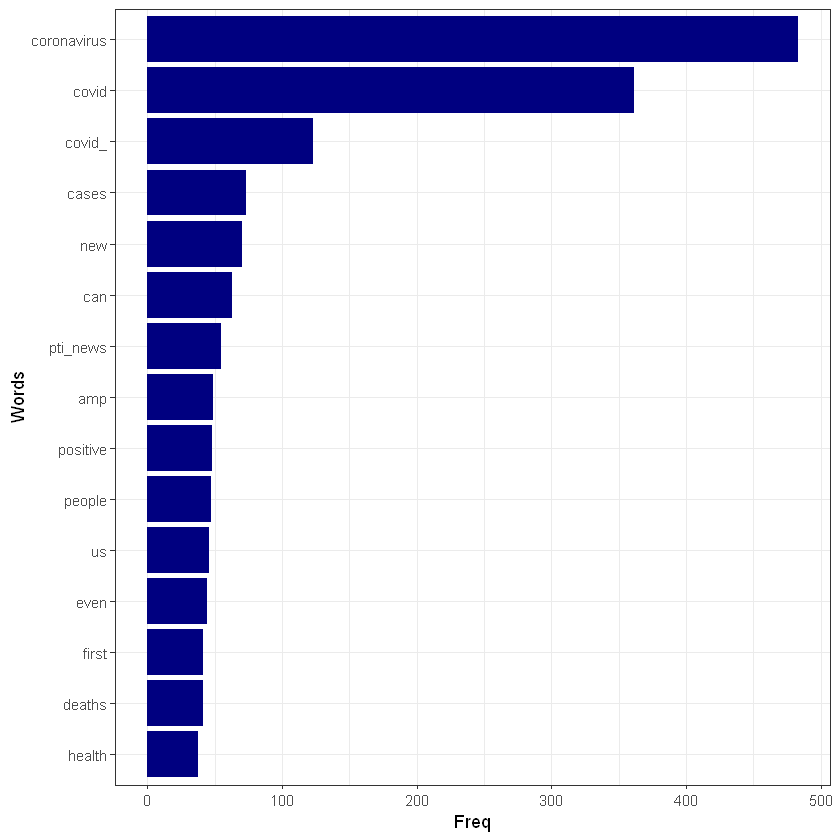

In [64]:
tab3 %>% head(15) %>%  ggplot(aes(x = reorder(word,Freq),y = Freq))+geom_bar(stat = "identity",fill="navyblue")+xlab("Words")+theme_bw()+coord_flip()


# top 15 tweets done in the twitter dataset

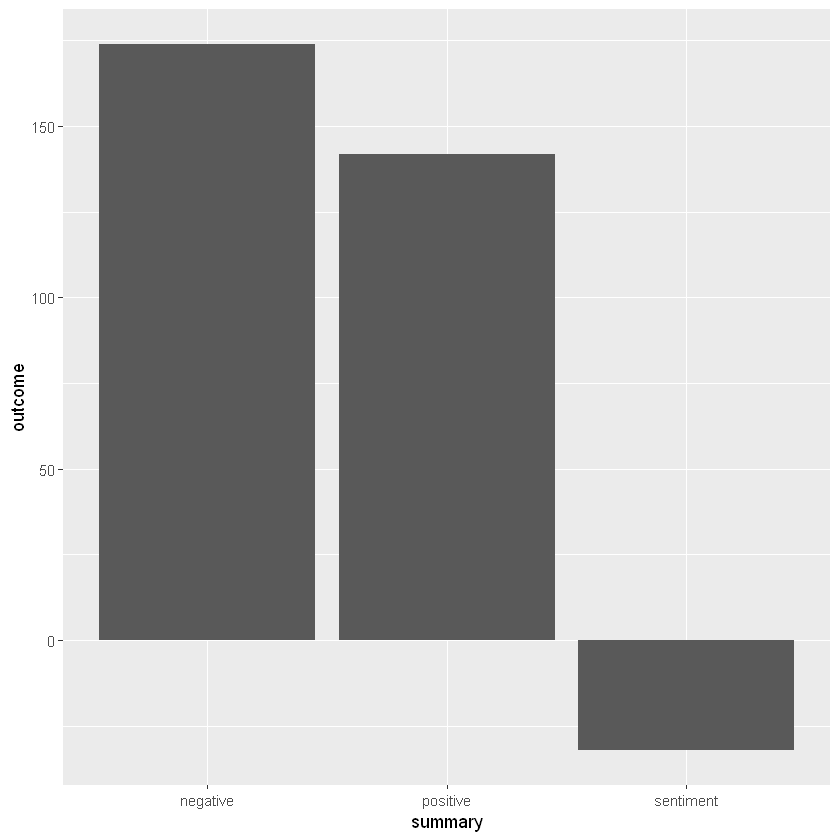

In [68]:
sentiments_1 <- data.frame(summary = c("positive", "negative", "sentiment"), outcome = c(142, 174, -32))
ggplot(sentiments_1, aes(summary, outcome)) + geom_col()

# This is the visual representation of sentiments on covid-19 data from twitter data.